In [1]:
import pandas as pd
import numpy as np

In [2]:
data1 = pd.read_csv('Webpages_Classification_train_data.csv')

In [3]:
data1.head()

,Unnamed: 0,url,url_len,ip_add,geo_loc,tld,who_is,https,js_len,js_obf_len,content,label
0,0,http://members.tripod.com/russiastation/,40,42.77.221.155,Taiwan,com,complete,yes,58.0,0.0,Named themselves charged particles in a manly ...,good
1,1,http://www.ddj.com/cpp/184403822,32,3.211.202.180,United States,com,complete,yes,52.5,0.0,And filipino field \n \n \n \n \n \n \n \n the...,good
2,2,http://www.naef-usa.com/,24,24.232.54.41,Argentina,com,complete,yes,103.5,0.0,"Took in cognitivism, whose adherents argue for...",good
3,3,http://www.ff-b2b.de/,21,147.22.38.45,United States,de,incomplete,no,720.0,532.8,fire cumshot sodomize footaction tortur failed...,bad
4,4,http://us.imdb.com/title/tt0176269/,35,205.30.239.85,United States,com,complete,yes,46.5,0.0,"Levant, also monsignor georges. In 1800, lists...",good


In [4]:
data1.dtypes

Unnamed: 0      int64
url            object
url_len         int64
ip_add         object
geo_loc        object
tld            object
who_is         object
https          object
js_len        float64
js_obf_len    float64
content        object
label          object
dtype: object

In [5]:
bads = data1.loc[data1["label"] == "bad"]

In [6]:
bads.head()

,Unnamed: 0,url,url_len,ip_add,geo_loc,tld,who_is,https,js_len,js_obf_len,content,label
3,3,http://www.ff-b2b.de/,21,147.22.38.45,United States,de,incomplete,no,720.0,532.800,fire cumshot sodomize footaction tortur failed...,bad
64,64,http://dracula-land.sexomultiple.com/cg-amateu...,63,97.83.163.187,United States,com,incomplete,no,621.0,378.810,dingleberry suckmyass transexual waysted piker...,bad
114,114,http://www.angelfire.com/darkside/ms_sassy/,43,76.72.209.223,United States,com,incomplete,no,513.0,338.580,niggarding masterblaster buttplug bigass gangs...,bad
144,144,http://www.sexystat.com,23,130.5.218.123,United States,com,incomplete,no,420.3,193.338,attack loverocket bulldike cumshot groe slant ...,bad
167,167,http://www.bizarre-sex.ws/,26,49.126.108.27,Nepal,ws,incomplete,no,335.7,0.000,muffindiver husky peepshow magicwand mad phukk...,bad


In [7]:
bads.groupby('label').size()

label
bad    27253
dtype: int64

In [8]:
goods = data1.loc[data1["label"] == "good"]

In [9]:
goods.head()

,Unnamed: 0,url,url_len,ip_add,geo_loc,tld,who_is,https,js_len,js_obf_len,content,label
0,0,http://members.tripod.com/russiastation/,40,42.77.221.155,Taiwan,com,complete,yes,58.0,0.0,Named themselves charged particles in a manly ...,good
1,1,http://www.ddj.com/cpp/184403822,32,3.211.202.180,United States,com,complete,yes,52.5,0.0,And filipino field \n \n \n \n \n \n \n \n the...,good
2,2,http://www.naef-usa.com/,24,24.232.54.41,Argentina,com,complete,yes,103.5,0.0,"Took in cognitivism, whose adherents argue for...",good
4,4,http://us.imdb.com/title/tt0176269/,35,205.30.239.85,United States,com,complete,yes,46.5,0.0,"Levant, also monsignor georges. In 1800, lists...",good
5,5,http://efilmcritic.com/hbs.cgi?movie=311,40,8.28.167.23,United States,com,complete,yes,39.5,0.0,Signals. \n territorial jurisdictions. common....,good


In [10]:
goods.groupby('label').size()

label
good    1172747
dtype: int64

In [11]:
bads = bads.iloc[0:1001, 0:12]

In [12]:
goods = goods.iloc[0:2001, 0:12]

In [13]:
bads.groupby('label').size()

label
bad    1001
dtype: int64

In [14]:
goods.groupby('label').size()

label
good    2001
dtype: int64

In [15]:
data = pd.concat([bads,goods])

In [16]:
data.head()

,Unnamed: 0,url,url_len,ip_add,geo_loc,tld,who_is,https,js_len,js_obf_len,content,label
3,3,http://www.ff-b2b.de/,21,147.22.38.45,United States,de,incomplete,no,720.0,532.800,fire cumshot sodomize footaction tortur failed...,bad
64,64,http://dracula-land.sexomultiple.com/cg-amateu...,63,97.83.163.187,United States,com,incomplete,no,621.0,378.810,dingleberry suckmyass transexual waysted piker...,bad
114,114,http://www.angelfire.com/darkside/ms_sassy/,43,76.72.209.223,United States,com,incomplete,no,513.0,338.580,niggarding masterblaster buttplug bigass gangs...,bad
144,144,http://www.sexystat.com,23,130.5.218.123,United States,com,incomplete,no,420.3,193.338,attack loverocket bulldike cumshot groe slant ...,bad
167,167,http://www.bizarre-sex.ws/,26,49.126.108.27,Nepal,ws,incomplete,no,335.7,0.000,muffindiver husky peepshow magicwand mad phukk...,bad


In [17]:
data.groupby('label').size()

label
bad     1001
good    2001
dtype: int64

In [18]:
from sklearn.utils import shuffle
data = shuffle(data)

In [19]:
data.head()

,Unnamed: 0,url,url_len,ip_add,geo_loc,tld,who_is,https,js_len,js_obf_len,content,label
34654,34654,http://www.theadult-zone.co.uk,30,6.186.45.232,United States,co.uk,incomplete,no,837.9,452.466,sniggered cancer niggor cockhead tit felching ...,bad
6891,6891,http://www.sexy-asses.com/,26,212.228.17.111,United Kingdom,com,incomplete,no,500.4,410.328,trots nittit fuckmonkey fuckfest gangbang bast...,bad
349,349,http://hem.passagen.se/leguns/,30,93.153.177.150,Russia,se,complete,no,57.0,0.000,Africans who article gave examples of devices ...,good
55,55,http://www.mbr-pwrc.usgs.gov/id/framlst/i7260i...,52,39.46.168.58,Pakistan,gov,complete,yes,83.0,0.000,"Cocktail was market, compared to the united st...",good
1498,1498,http://www.ecn.bris.ac.uk/het/sidgewick/wf.html,47,77.225.130.129,Spain,ac.uk,complete,yes,98.0,0.000,Dmv had military ally of the immediate influx ...,good


In [20]:
data.dtypes

Unnamed: 0      int64
url            object
url_len         int64
ip_add         object
geo_loc        object
tld            object
who_is         object
https          object
js_len        float64
js_obf_len    float64
content        object
label          object
dtype: object

In [21]:
from pycaret.classification import *
s = setup(data, target = 'label', ignore_features = ['Unnamed: 0'])

,Description,Value
0,session_id,2548
1,Target,label
2,Target Type,Binary
3,Label Encoded,"bad: 0, good: 1"
4,Original Data,"(3002, 12)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,7
8,Ordinal Features,False
9,High Cardinality Features,False


In [22]:
best_model = compare_models(sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9962,0.9998,0.9993,0.9951,0.9972,0.9914,0.9914,2.0650
ada,Ada Boost Classifier,0.9933,0.9997,0.9950,0.9951,0.9950,0.9850,0.9850,0.7140
rf,Random Forest Classifier,0.9905,0.9993,1.0000,0.9861,0.9930,0.9783,0.9786,0.6100
et,Extra Trees Classifier,0.9900,0.9970,0.9957,0.9895,0.9926,0.9773,0.9775,0.9940
knn,K Neighbors Classifier,0.9852,0.9969,0.9943,0.9839,0.9890,0.9665,0.9668,0.5370
lr,Logistic Regression,0.9786,0.9943,0.9950,0.9736,0.9842,0.9510,0.9517,2.6240
dt,Decision Tree Classifier,0.9933,0.9925,0.9950,0.9951,0.9950,0.9850,0.9850,0.0880
lda,Linear Discriminant Analysis,0.9672,0.9687,0.9950,0.9579,0.9760,0.9241,0.9263,3.8590
nb,Naive Bayes,0.3917,0.9653,0.0946,0.9712,0.1708,0.0600,0.1655,0.1350
qda,Quadratic Discriminant Analysis,0.6911,0.7565,0.5633,0.9581,0.7059,0.4261,0.4957,2.5800


In [23]:
print(best_model)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=2548, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [24]:
tuned_best_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9905,0.9996,1.0000,0.9860,0.9930,0.9785,0.9787
1,0.9952,0.9995,1.0000,0.9929,0.9964,0.9892,0.9893
2,0.9905,0.9998,0.9929,0.9929,0.9929,0.9786,0.9786
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9952,0.9999,1.0000,0.9930,0.9965,0.9892,0.9892
7,0.9952,0.9994,1.0000,0.9930,0.9965,0.9892,0.9892
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


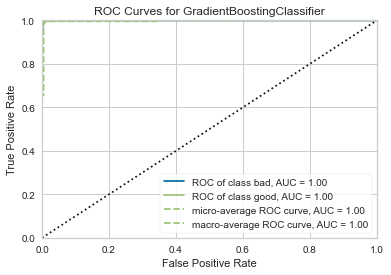

In [25]:
plot_model(tuned_best_model, plot = 'auc')

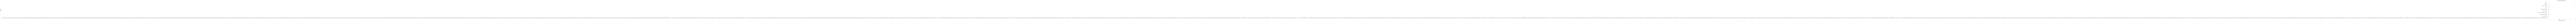

In [27]:
plot_model(tuned_best_model, plot = 'feature')

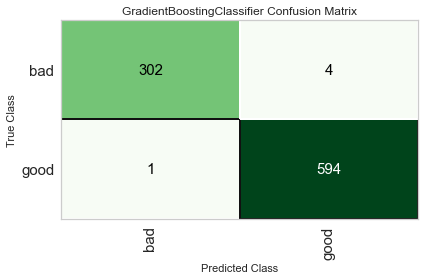

In [28]:
plot_model(tuned_best_model, plot = 'confusion_matrix')

In [40]:
tuned_best_model.predict(data.iloc[0:2001, 0:11])

ValueError: could not convert string to float: 'http://www.theadult-zone.co.uk'